In [1]:
import warnings
warnings.filterwarnings('ignore')



# SKLearn Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , Perceptron

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

# SKLearn ensemble classifiers
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier , BaggingClassifier
from sklearn.ensemble import VotingClassifier , AdaBoostClassifier

# SKLearn Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# plot functions
import plotFunctions as pfunc
import dataFunctions as dfunc

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\Users\lvarr\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
full = dfunc.loadData()

In [3]:
full.head(50)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [4]:
full = dfunc.convertSexToNum(full, True)

Process  Sex  : Concluded!


In [5]:
full = dfunc.fillTitles(full)

Process  Title  : Concluded!


In [6]:
#full = dfunc.fillMissingAge(full)
full = dfunc.fillAge(full)

Process  Age  : Concluded!


In [7]:
full.info()
full.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Sex            1309 non-null int64
Title          1309 non-null object
Master         1309 non-null uint8
Miss           1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Officer        1309 non-null uint8
Royalty        1309 non-null uint8
dtypes: float64(3), int64(5), object(5), uint8(6)
memory usage: 140.7+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex,Title,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,0,Mr,0,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,1,Mrs,0,0,0,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,1,Miss,0,1,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,1,Mrs,0,0,0,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,0,Mr,0,0,1,0,0,0
5,26.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,0,0.0,330877,0,Mr,0,0,1,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0.0,17463,0,Mr,0,0,1,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,3,0.0,349909,0,Master,1,0,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,1.0,347742,1,Mrs,0,0,0,1,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1.0,237736,1,Mrs,0,0,0,1,0,0


In [8]:
full = dfunc.fillMissingFare(full)

Process  Fare  : Concluded!


In [9]:
full = dfunc.featureEng(full)

Process  Family  : Concluded!
Process  Ticket group  : Concluded!
Process  Fare  : Concluded!


In [10]:
full = dfunc.fillEmbarked(full)

Process  Embarked  : Concluded!


In [11]:
full = dfunc.fillTitles(full)

Process  Title  : Concluded!


In [12]:
full = dfunc.fillTicket(full)

Process  Ticket  : Concluded!


In [13]:
full = dfunc.fillDeck(full)

Process  Deck  : Concluded!


In [14]:
#full = dfunc.fillCabin(full)

In [15]:
print(full.isnull().sum())


Age                  0
Cabin             1014
Fare                 0
Name                 0
Parch                0
PassengerId          0
Pclass               0
SibSp                0
Survived           418
Sex                  0
Title                0
Master               0
Miss                 0
Mr                   0
Mrs                  0
Officer              0
Royalty              0
Child                0
Young                0
Family               0
Family1              0
Family2              0
Family3              0
Family4              0
Family5              0
Family6              0
Family7              0
Family8              0
Family9              0
Family10             0
                  ... 
Ticket_CASOTON       0
Ticket_FC            0
Ticket_FCC           0
Ticket_Fa            0
Ticket_LINE          0
Ticket_LP            0
Ticket_PC            0
Ticket_PP            0
Ticket_PPP           0
Ticket_SC            0
Ticket_SCA3          0
Ticket_SCA4          0
Ticket_SCAH

In [16]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 82 columns):
Age               1309 non-null float64
Cabin             295 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
SibSp             1309 non-null int64
Survived          891 non-null float64
Sex               1309 non-null int64
Title             1309 non-null object
Master            1309 non-null uint8
Miss              1309 non-null uint8
Mr                1309 non-null uint8
Mrs               1309 non-null uint8
Officer           1309 non-null uint8
Royalty           1309 non-null uint8
Child             1309 non-null bool
Young             1309 non-null bool
Family            1309 non-null int64
Family1           1309 non-null int64
Family2           1309 non-null int64
Family3           1309 non-null int64
Family4       

In [17]:
train_X, test_X, target_y = pfunc.prepareTrainTestTarget(full)
model = RandomForestClassifier(n_estimators=100, max_features='sqrt')


In [21]:
train_X = train_X.drop('Cabin',1)
train_X = train_X.drop('Name',1)
train_X = train_X.drop('Title',1)
train_X = train_X.drop('TicketType',1)
train_X = train_X.drop('Deck',1)
train_X = train_X.drop('Survived',1)

In [22]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 77 columns):
Age               891 non-null float64
Fare              891 non-null float64
Parch             891 non-null int64
PassengerId       891 non-null int64
Pclass            891 non-null int64
SibSp             891 non-null int64
Sex               891 non-null int64
Master            891 non-null uint8
Miss              891 non-null uint8
Mr                891 non-null uint8
Mrs               891 non-null uint8
Officer           891 non-null uint8
Royalty           891 non-null uint8
Child             891 non-null bool
Young             891 non-null bool
Family            891 non-null int64
Family1           891 non-null int64
Family2           891 non-null int64
Family3           891 non-null int64
Family4           891 non-null int64
Family5           891 non-null int64
Family6           891 non-null int64
Family7           891 non-null int64
Family8           891 non-null int64
Famil

In [23]:
model.fit( train_X , target_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
features = pd.DataFrame()
features['feature'] = train_X.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)



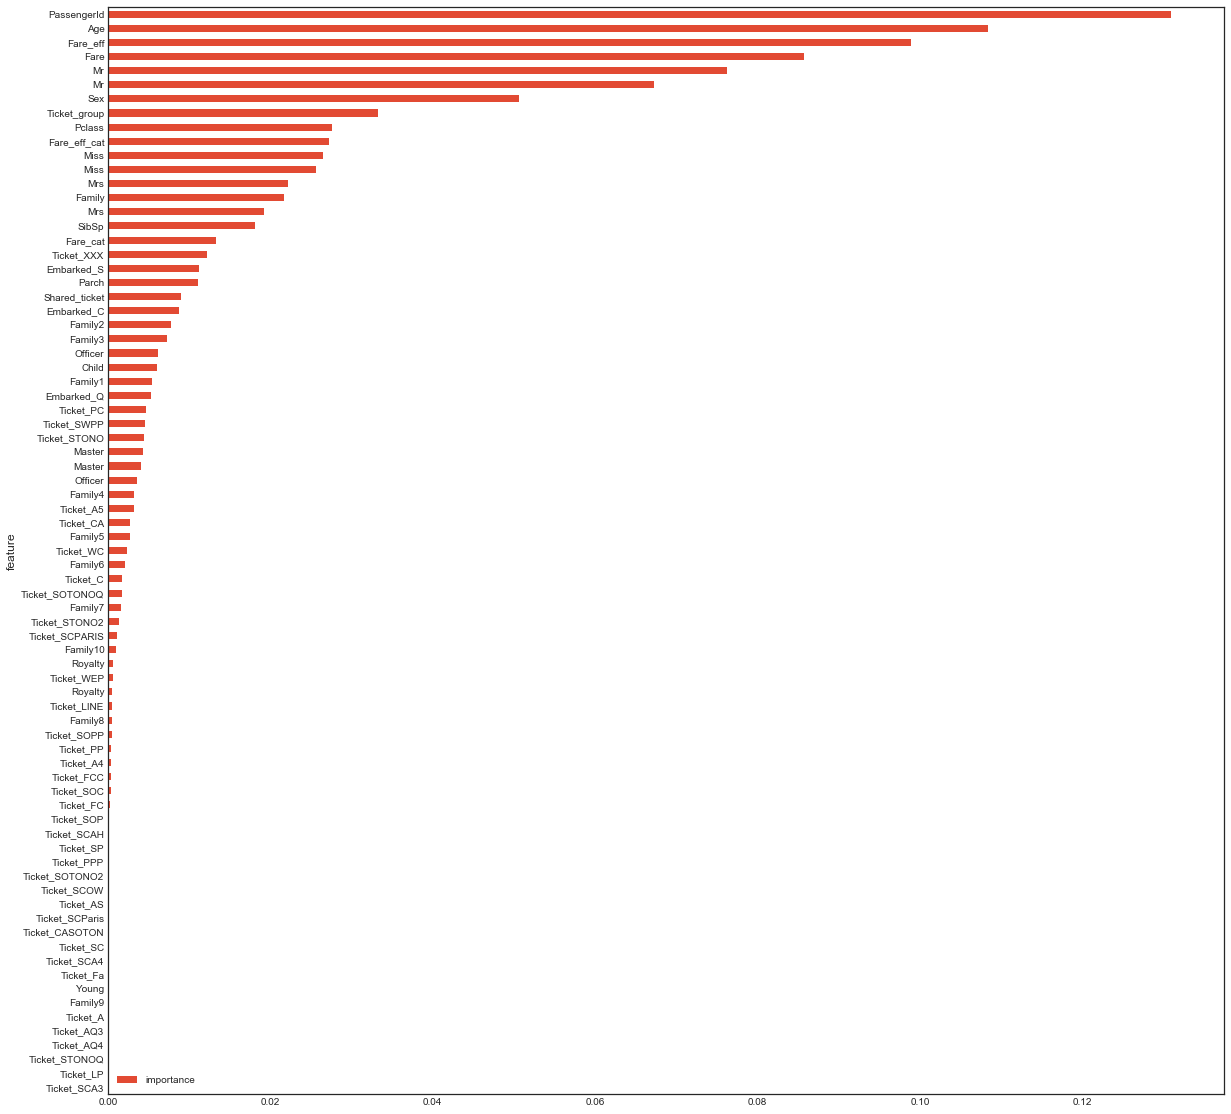

In [25]:
features.plot(kind='barh', figsize=(20, 20))

In [26]:
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.8092625435892854

In [27]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
model = RandomForestClassifier(**parameters)
model.fit( train_X , target_y )

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.82605420196631874

In [29]:
model = DecisionTreeClassifier(random_state=0)
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.74539307401587429

In [30]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=1)
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.64215868077978944

In [31]:
model = GradientBoostingClassifier()
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.78018102076504359

In [32]:
model = ExtraTreesClassifier()
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.7857171836028749

In [33]:
model = BaggingClassifier()
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.79593674983252283

In [34]:
model = AdaBoostClassifier()
model.fit( train_X , target_y )
pfunc.calcScore(model, train_X , target_y, scoring='accuracy')

0.76556743470340138